<a href="https://colab.research.google.com/github/yhanyi/MLNotebooks/blob/main/StonksEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StonksEDA
Just a bit of EDA using different indicators, messing around with datasets from Yahoo Finance.

In [1]:
!pip install yfinance

In [2]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=2fba9eea86561d073536f5b6e74adb75b8a40ec34d879b77b093baf9fb3d0795
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
df_pltr = yf.download(tickers="PLTR", start="2020-01-01")
df_c3ai = yf.download(tickers="AI", start="2020-01-01")
print(df_pltr.shape, df_c3ai.shape)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(865, 6) (816, 6)


In [5]:
print(df_pltr.head())
print(df_c3ai.head())

             Open   High   Low  Close  Adj Close     Volume
Date                                                       
2020-09-30  10.00  11.41  9.11   9.50       9.50  338584400
2020-10-01   9.69  10.10  9.23   9.46       9.46  124297600
2020-10-02   9.06   9.28  8.94   9.20       9.20   55018300
2020-10-05   9.43   9.49  8.92   9.03       9.03   36316900
2020-10-06   9.04  10.18  8.90   9.90       9.90   90864000
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-09  100.000000  115.000000   90.029999   92.489998   92.489998   
2020-12-10   99.480003  131.746002   96.000000  130.000000  130.000000   
2020-12-11  123.820000  133.000000  116.000000  119.580002  119.580002   
2020-12-14  122.160004  123.830002  100.660004  102.360001  102.360001   
2020-12-15  104.570000  109.889999   98.099998  102.000000  102.000000   

              Volume  
Date                  
2020-12-09  248

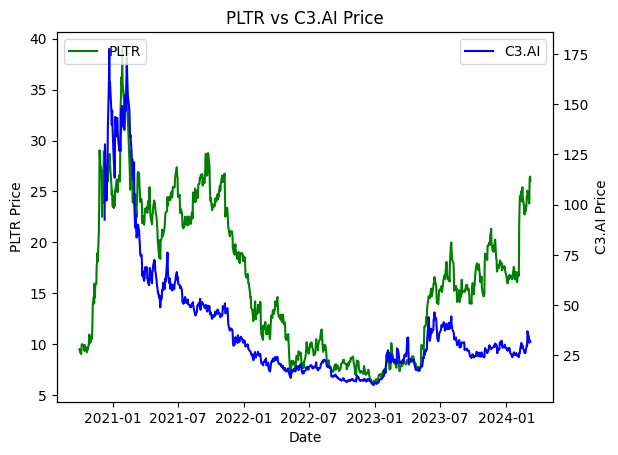

In [6]:
fig, ax = plt.subplots()
ax.plot(df_pltr["Close"], color="green", label="PLTR")
ax.set_xlabel("Date")
ax.set_ylabel("PLTR Price")
ax.legend(loc="upper left")

ax2 = ax.twinx()
ax2.plot(df_c3ai["Close"], color="blue", label="C3.AI")
ax2.set_ylabel("C3.AI Price")
ax2.legend(loc="upper right")

plt.title("PLTR vs C3.AI Price")
plt.show()

In [7]:
df_pltr.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# df_pltr.dropna(inplace=True)
# df_pltr.drop(['Close'], axis=1, inplace=True)
# dropZeros = df_pltr[df_pltr["Volume"] == 0].index
# df_pltr = df_pltr.drop(dropZeros)

In [8]:
# Relative Strength Index (RSI)
df_pltr.ta.rsi(close="Adj Close", append=True)
# Moving Average Convergence/Divergence (MACD)
df_pltr["macd"] = df_pltr.ta.macd(close="Adj Close").iloc[:, 0]
# Bollinger Bands
bands = ["lower_band", "middle_band", "upper_band"]
for i in range(3):
  df_pltr[bands[i]] = df_pltr.ta.bbands(close="Adj Close").iloc[:, i]
# Average True Range (ATR)
df_pltr["atr"] = df_pltr.ta.atr(close="Adj Close", length=20)
# Average Price
df_pltr["avg"] = df_pltr.ta.midprice(close="Adj Close", length=1)
# SMA40
df_pltr["sma40"] = df_pltr.ta.sma(length=40)
# SMA80
df_pltr["sma80"] = df_pltr.ta.sma(length=80)
# SMA160
df_pltr["sma160"] = df_pltr.ta.sma(length=160)

In [9]:
df_pltr.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [10]:
df_pltr.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,lower_band,middle_band,upper_band,atr,avg,sma40,sma80,sma160
Date,,,,,,,,,,,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400,NaN,NaN,NaN,NaN,NaN,NaN,10.260,NaN,NaN,NaN
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600,NaN,NaN,NaN,NaN,NaN,NaN,9.665,NaN,NaN,NaN
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300,NaN,NaN,NaN,NaN,NaN,NaN,9.110,NaN,NaN,NaN
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900,NaN,NaN,NaN,NaN,NaN,NaN,9.205,NaN,NaN,NaN
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000,NaN,NaN,8.82546,9.418,10.01054,NaN,9.540,NaN,NaN,NaN


In [11]:
from scipy.stats import linregress
def getSlope(array):
  y = np.array(array)
  x = np.arange(len(y))
  slope, intercept, r_value, p_value, std = linregress(x, y)
  return slope

In [12]:
# Calculate the slopes using the last 10 values of each feature
backrollingValue = 10
# Apply linear regression on a few indicators to look at the trends
df_pltr["SlopeSMA40"] = df_pltr["sma40"].rolling(window=backrollingValue).apply(getSlope, raw=True)
df_pltr["SlopeSMA80"] = df_pltr["sma80"].rolling(window=backrollingValue).apply(getSlope, raw=True)
df_pltr["SlopeSMA160"] = df_pltr["sma160"].rolling(window=backrollingValue).apply(getSlope, raw=True)
df_pltr["SlopeAVG"] = df_pltr["avg"].rolling(window=backrollingValue).apply(getSlope, raw=True)
df_pltr["SlopeRSI"] = df_pltr["RSI_14"].rolling(window=backrollingValue).apply(getSlope, raw=True)
df_pltr.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,lower_band,middle_band,...,atr,avg,sma40,sma80,sma160,SlopeSMA40,SlopeSMA80,SlopeSMA160,SlopeAVG,SlopeRSI
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400,NaN,NaN,NaN,NaN,...,NaN,10.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600,NaN,NaN,NaN,NaN,...,NaN,9.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300,NaN,NaN,NaN,NaN,...,NaN,9.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900,NaN,NaN,NaN,NaN,...,NaN,9.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000,NaN,NaN,8.82546,9.418,...,NaN,9.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Target Categories

In [22]:
pipdiff = 1.0
SLTPRatio = 2 # pipDiff/Ratio = SL
def getTarget(bars, data):
    length = len(data)
    high = list(data['High'])
    low = list(data['Low'])
    close = list(data['Close'])
    open = list(data['Open'])
    trend = [None] * length

    for line in range (0,length-bars-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,bars+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if valueOpenLow >= pipdiff and -valueOpenHigh <= pipdiff/SLTPRatio:
                trend[line] = 1 # Downtrend
            elif valueOpenLow <= pipdiff/SLTPRatio and -valueOpenHigh >= pipdiff:
                trend[line] = 2 # Uptrend
            else:
                trend[line] = 0 # Unclear

    return trend

In [23]:
pltr = df_pltr.copy(deep=True)
pltr["Target"] = getTarget(16, pltr)
pltr.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,lower_band,middle_band,...,avg,sma40,sma80,sma160,SlopeSMA40,SlopeSMA80,SlopeSMA160,SlopeAVG,SlopeRSI,Target
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400,NaN,NaN,NaN,NaN,...,10.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600,NaN,NaN,NaN,NaN,...,9.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300,NaN,NaN,NaN,NaN,...,9.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900,NaN,NaN,NaN,NaN,...,9.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000,NaN,NaN,8.82546,9.418,...,9.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<ipython-input-24-aac0dd95dae9>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_model.hist(ax=ax)


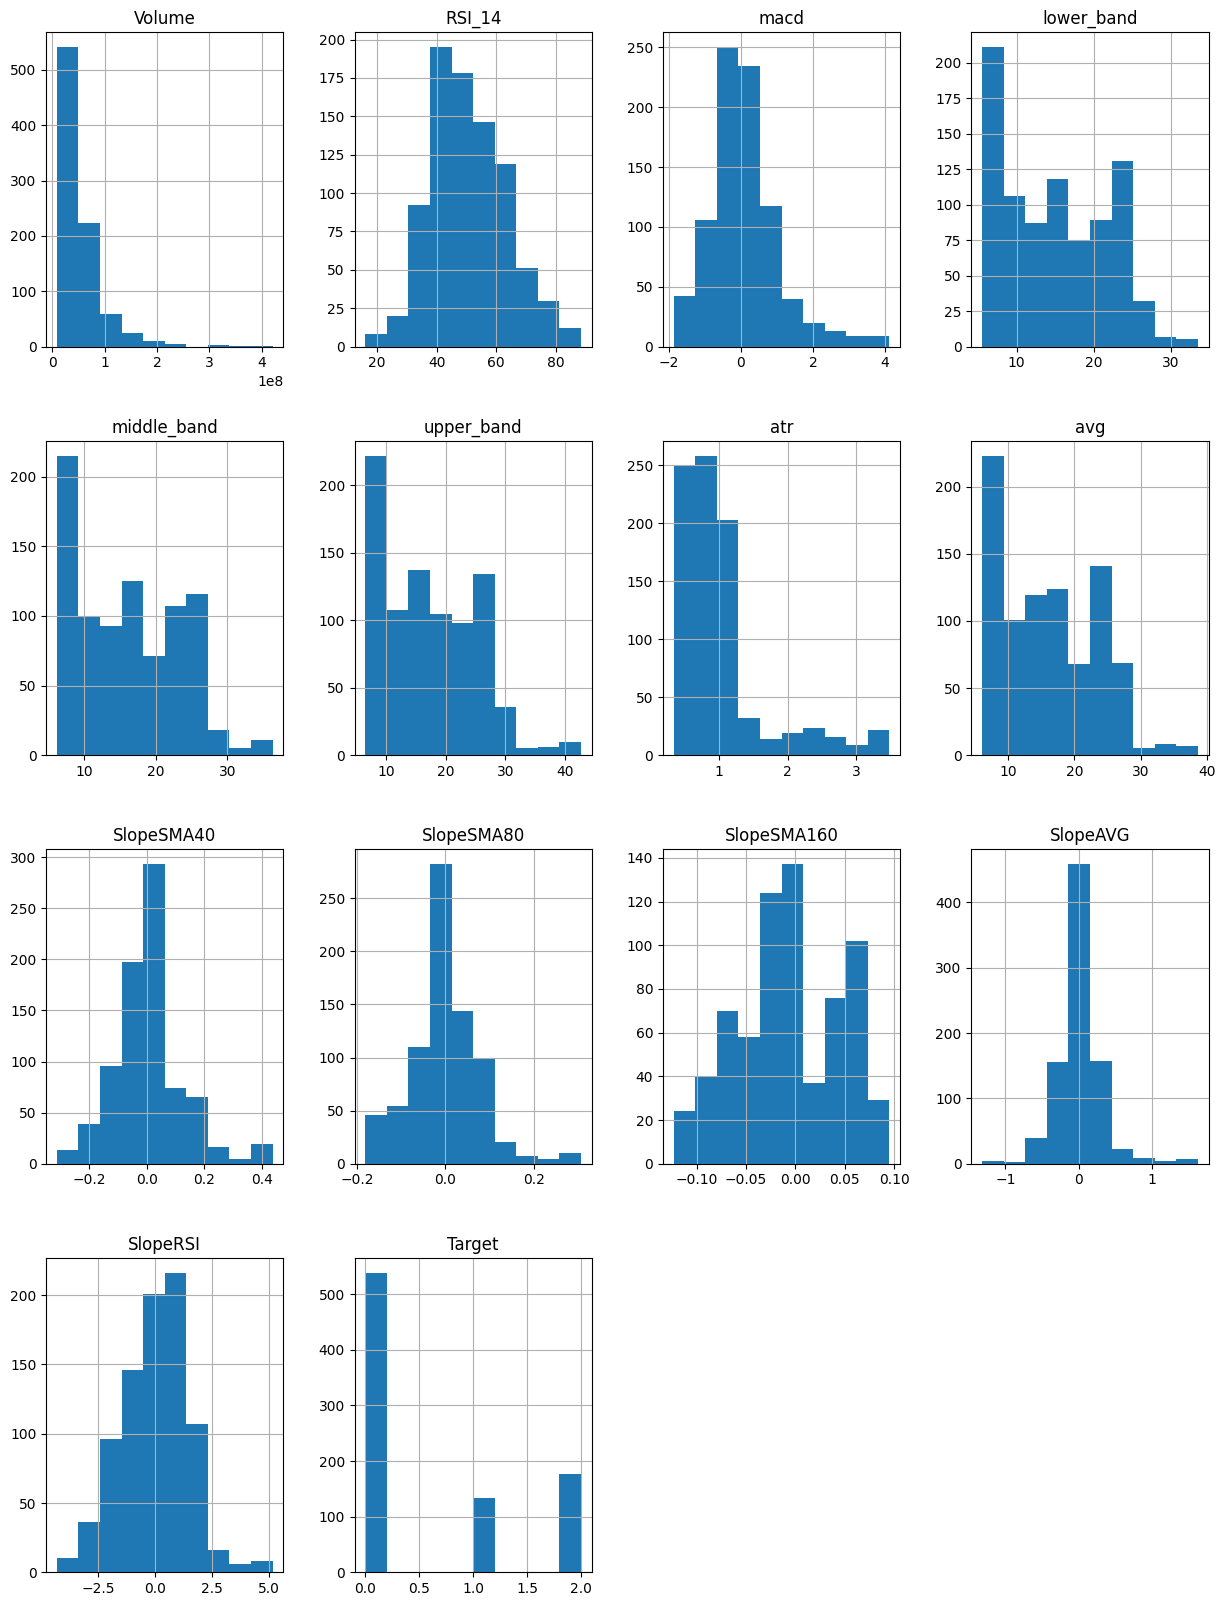

In [24]:
figure = plt.figure(figsize=(15,20))
ax = figure.gca()
data_model = pltr[["Volume", "RSI_14", "macd", "lower_band", "middle_band", "upper_band", "atr", "avg", "SlopeSMA40", "SlopeSMA80", "SlopeSMA160", "SlopeAVG", "SlopeRSI", "Target"]]
data_model.hist(ax=ax)
plt.show()

### RSI Trend Indicator???

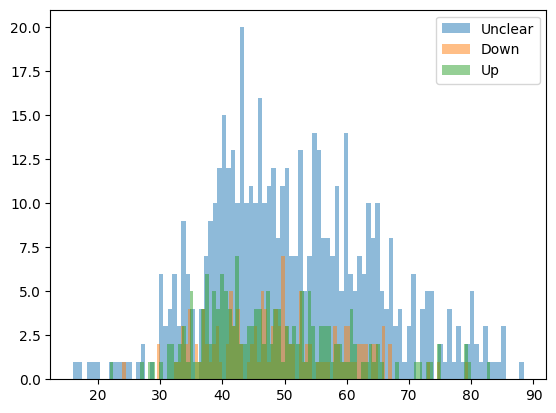

In [26]:
temp_up = pltr.RSI_14[pltr['Target'] == 2]
temp_down = pltr.RSI_14[pltr['Target'] == 1]
temp_unclear = pltr.RSI_14[pltr['Target'] == 0]
plt.hist(temp_unclear, bins=100, alpha=0.5, label='Unclear')
plt.hist(temp_down, bins=100, alpha=0.5, label='Down')
plt.hist(temp_up, bins=100, alpha=0.5, label='Up')

plt.legend(loc='upper right')
plt.show()

### Train Test Splitting

In [27]:
def train_test_split(df, test):
  test_length = len(df) - test
  train_length = int(0.8 * test_length)
  df_train, df_val, df_test = df[:train_length], df[train_length:test_length], df[test_length:]
  return df_train, df_val, df_test

def create(df, timestep):
  df_x, df_y = [], []
  for i in range(len(df) - timestep):
    x = df[i:i+timestep]
    x = [j for j in x]
    y = df[i+timestep]
    df_x.append(x)
    df_y.append(y)
  return np.array(df_x), np.array(df_y)

In [28]:
print(df_pltr)
print(len(df_pltr))

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-09-30  10.000000  11.410000   9.110000   9.500000   9.500000  338584400   
2020-10-01   9.690000  10.100000   9.230000   9.460000   9.460000  124297600   
2020-10-02   9.060000   9.280000   8.940000   9.200000   9.200000   55018300   
2020-10-05   9.430000   9.490000   8.920000   9.030000   9.030000   36316900   
2020-10-06   9.040000  10.180000   8.900000   9.900000   9.900000   90864000   
...               ...        ...        ...        ...        ...        ...   
2024-03-04  24.400000  24.580000  23.530001  24.040001  24.040001   64320000   
2024-03-05  23.959999  24.409000  23.430000  23.809999  23.809999   49542300   
2024-03-06  25.750000  26.750000  24.530001  26.160000  26.160000  207386900   
2024-03-07  27.010000  27.500000  26.379999  26.459999  26.459999  117519300   
2024-03-08  27.190001  27.280001  25.809

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))
df_pltr = mms.fit_transform(df_pltr)
X_data, y_data = create(df_pltr, 20)
X_train, X_valid, X_test = train_test_split(X_data, 10)
y_train, y_valid, y_test = train_test_split(y_data, 10)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((668, 20, 21), (668, 21), (167, 20, 21), (167, 21), (10, 20, 21), (10, 21))

In [30]:
X_train[1][-1] == y_train[0]

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False])